In [1]:
import csv
import os

path = "/Users/qiaowenyang/Desktop/newpj/chatbot/csv"
files = os.listdir(path)
pairs = []
for file in files:
    fullpath = os.path.join(path, file)
    f = open(fullpath, 'r')
    reader = csv.reader(_.replace('\x00', '') for _ in f)
    lst = list(reader)
    for i in range(len(lst)):
        if len(lst[i]) < 4:
            continue
        content = lst[i][3]
        if len(content) > 11 and content[6:11] == "emoji":
            idx = content.find("thumburl") # 只提取静态表情
            if idx == -1:
                continue
            left = content.find("\"", idx)
            right = content.find("\"", left + 1)
            url = content[left + 1:right]
            if url == "":
                continue
            if i > 1 and len(lst[i - 1]) > 6 and lst[i - 1][6] == '1': # 表情的上一句需是文字
                last_text = lst[i - 1][3]
                if last_text.find("wxid_") != -1: # 处理群聊中的wxid
                    colon_idx = last_text.find(":")
                    last_text = last_text[colon_idx + 2:]
                pair = []
                pair.append(last_text)
                pair.append(url)
                pairs.append(pair)
    f.close()
#print(pairs)

In [2]:
'''pairs_path = "/Users/qiaowenyang/Desktop/newpj/chatbot/pairs/pairs.csv"
with open(pairs_path, 'w', newline='') as f:
    writer = csv.writer(f)
    for row in pairs:
        writer.writerow(row)'''

'pairs_path = "/Users/qiaowenyang/Desktop/newpj/chatbot/pairs/pairs.csv"\nwith open(pairs_path, \'w\', newline=\'\') as f:\n    writer = csv.writer(f)\n    for row in pairs:\n        writer.writerow(row)'

In [3]:
print(len(pairs))

3393


In [4]:
import random

train_path = "/Users/qiaowenyang/Desktop/newpj/chatbot/pairs/train.csv"
test_path = "/Users/qiaowenyang/Desktop/newpj/chatbot/pairs/test.csv"
shuffle_pairs = pairs
random.shuffle(shuffle_pairs)
train_num = int(len(pairs) * 0.8)
trainset = shuffle_pairs[:train_num]
testset = shuffle_pairs[train_num:]

In [5]:
'''with open(train_path, 'w', newline='') as f:
    writer = csv.writer(f)
    for row in trainset:
        writer.writerow(row)
with open(test_path, 'w', newline='') as f:
    writer = csv.writer(f)
    for row in testset:
        writer.writerow(row)'''

"with open(train_path, 'w', newline='') as f:\n    writer = csv.writer(f)\n    for row in trainset:\n        writer.writerow(row)\nwith open(test_path, 'w', newline='') as f:\n    writer = csv.writer(f)\n    for row in testset:\n        writer.writerow(row)"

In [6]:
dict = {}
for pair in pairs:
    dict[pair[1]] = dict.get(pair[1], 0) + 1
print(dict)

{'http://mmbiz.qpic.cn/mmemoticon/ajNVdqHZLLA4XqclcticIpBxatFL9r3cCk1SpnFFh0DQc2H2xFkKZlS3Yw8qLMmZy/0': 20, 'http://mmbiz.qpic.cn/mmemoticon/ajNVdqHZLLAhXBBjIqSl2alppYxibyIPibBJDVPnpiaUHuE9DnafJxaFxbCicfw1k9JV/0': 2, 'http://mmbiz.qpic.cn/mmemoticon/Q3auHgzwzM5llZ8F17rYSxaT0rHd1ibtq83VqoK8HNiadrBn4c79H7IDZqxCzKTD98/0': 64, 'http://mmbiz.qpic.cn/mmemoticon/ajNVdqHZLLCdwOLyl7c6JM4VOicLMB1H8ldGoG6pf6YSWq0ic3dP0hsI1yibXwJoHyF/0': 339, 'http://mmbiz.qpic.cn/mmemoticon/ajNVdqHZLLA5Maia2pqHavZryuhvTvV1wic0s7jAFLjwUuq8FTF2xRzM7foy8asiadA/0': 3, 'http://mmbiz.qpic.cn/mmemoticon/ajNVdqHZLLC3ib2qk5SSCGLN1GGzwwphbh5ec1NXqLPsB0lZ6woHJgxvgOsLKJNvg/0': 42, 'http://mmbiz.qpic.cn/mmemoticon/Q3auHgzwzM7a38SyvibMdKu7QdRnzA2DNldJCv1I8P2TskAvwGmaoV6IwrOibvaeOK/0': 14, 'http://mmbiz.qpic.cn/mmemoticon/ajNVdqHZLLALxSLBT9ia2YFqoicgcpKia9mKDRDDNhtGUXNKXhyYU3S9IPIHibY5jIGO/0': 9, 'http://mmbiz.qpic.cn/mmemoticon/ajNVdqHZLLAqn9uGg0riawRrMRcbjeRHEUeXgepUY4fqkpyicK7ica5fktE5H097QSZ/0': 22, 'http://mmbiz.qpic.cn/mm

In [7]:
sorted_dict = sorted(dict.items(), key=lambda x: x[1], reverse=True)
print(sorted_dict[:10])

[('http://mmbiz.qpic.cn/mmemoticon/ajNVdqHZLLCdwOLyl7c6JM4VOicLMB1H8ldGoG6pf6YSWq0ic3dP0hsI1yibXwJoHyF/0', 339), ('http://mmbiz.qpic.cn/mmemoticon/ajNVdqHZLLALxSLBT9ia2YKwibicvnJT1lcGSPseOJib9Iibic4PK3OgQhNiaPPDznicicTV0/0', 116), ('http://mmbiz.qpic.cn/mmemoticon/ajNVdqHZLLAqn9uGg0riawTIoqtibyenzzoeRRXpQT1ME9Og5jIEicEI39WMYbX1LLM/0', 96), ('http://mmbiz.qpic.cn/mmemoticon/Q3auHgzwzM5llZ8F17rYSxaT0rHd1ibtq83VqoK8HNiadrBn4c79H7IDZqxCzKTD98/0', 64), ('http://mmbiz.qpic.cn/mmemoticon/Q3auHgzwzM7lf1vRwFDtwHoCmelDVIGiaLB6x8wMtR0yiaNQ7lK4LUXfsf2hIpex9D/0', 63), ('http://mmbiz.qpic.cn/mmemoticon/ajNVdqHZLLBVWrxFJdiaibzrsehMjZZU1xtm9xTUacErlzRLK7jbibuo0pSRES1IoCo/0', 47), ('http://mmbiz.qpic.cn/mmemoticon/ajNVdqHZLLCdwOLyl7c6JNk0zs9dNFASHTt5adwwV6ZcaO3ImnSwjnDj5LgBvjxy/0', 47), ('http://mmbiz.qpic.cn/mmemoticon/ajNVdqHZLLCSGzU8cqeRmFMDDiaw2KKbpJfic0AqHnkugYtKRbdUznnF9uUjcW7sM9/0', 47), ('http://mmbiz.qpic.cn/mmemoticon/ajNVdqHZLLAhXBBjIqSl2TVadDMGVSJN7H9Bty3NjyiaE7ibCuibHcLz07kMRWT0g7v/0', 44)

In [8]:
top_10_dict = sorted_dict[:10]
small_pairs = []
for (k, v) in top_10_dict:
    for pair in pairs:
        if pair[1] == k:
            small_pairs.append(pair)
print(len(small_pairs))

905


In [9]:
small_train_path = "/Users/qiaowenyang/Desktop/newpj/chatbot/pairs/smalltrain.csv"
small_test_path = "/Users/qiaowenyang/Desktop/newpj/chatbot/pairs/smalltest.csv"
small_shuffle_pairs = small_pairs
random.shuffle(small_shuffle_pairs)
small_train_num = int(len(small_pairs) * 0.8)
small_trainset = small_shuffle_pairs[:small_train_num]
small_testset = small_shuffle_pairs[small_train_num:]
print(len(small_trainset))
print(len(small_testset))

724
181


In [10]:
'''with open(small_train_path, 'w', newline='') as f:
    writer = csv.writer(f)
    for row in small_trainset:
        writer.writerow(row)
with open(small_test_path, 'w', newline='') as f:
    writer = csv.writer(f)
    for row in small_testset:
        writer.writerow(row)'''

"with open(small_train_path, 'w', newline='') as f:\n    writer = csv.writer(f)\n    for row in small_trainset:\n        writer.writerow(row)\nwith open(small_test_path, 'w', newline='') as f:\n    writer = csv.writer(f)\n    for row in small_testset:\n        writer.writerow(row)"

In [11]:
import jieba

seg_pairs = []
for pair in small_trainset:
    sent = pair[0]
    meme = pair[1]
    seg_list = jieba.cut(sent)
    new_pair = [list(seg_list), meme]
    seg_pairs.append(new_pair)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/kv/sdwj_qkj3yq7221vf10mzbh80000gn/T/jieba.cache
Loading model cost 0.627 seconds.
Prefix dict has been built succesfully.


In [12]:
from gensim.models import KeyedVectors

model = KeyedVectors.load('1000000.bin')
w_size = model.wv.syn0[0].shape[0]
vec_pairs = []
sent_idx = []
for pair in seg_pairs:
    seg_list = pair[0]
    meme = pair[1]
    sent_vec = [0] * w_size
    count = 0
    for w in seg_list:
        if w in model.wv.vocab.keys():
            sent_vec += model[w]
            count = count + 1
    if count != 0:
        for item in sent_vec:
            item /= count
        new_pair = [sent_vec, meme]
        vec_pairs.append(new_pair)
        sent_idx.append([sent_vec, ''.join(seg_list)])

/Users/qiaowenyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.
/Users/qiaowenyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  after removing the cwd from sys.path.
/Users/qiaowenyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]


In [13]:
print(w_size)

200


In [14]:
test_seg_pairs = []
for pair in small_testset:
    sent = pair[0]
    meme = pair[1]
    seg_list = jieba.cut(sent)
    new_pair = [list(seg_list), meme]
    test_seg_pairs.append(new_pair)

In [15]:
model = KeyedVectors.load('1000000.bin')
w_size = model.wv.syn0[0].shape[0]
test_vec_pairs = []
test_sent_idx = []
for pair in test_seg_pairs:
    seg_list = pair[0]
    meme = pair[1]
    sent_vec = [0] * w_size
    count = 0
    for w in seg_list:
        if w in model.wv.vocab.keys():
            sent_vec += model[w]
            count = count + 1
    if count != 0:
        for item in sent_vec:
            item /= count
        new_pair = [sent_vec, meme]
        test_vec_pairs.append(new_pair)
        test_sent_idx.append([sent_vec, ''.join(seg_list)])

/Users/qiaowenyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/Users/qiaowenyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  
/Users/qiaowenyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()


In [16]:
# vec_pairs：训练集，每个pair是句向量对应这个句子的表情包链接
# 用MLP进行分类：10个表情包，输入句向量size是1 * 200，输出size是10

import torch
import torch.nn as nn
import torch.nn.init as init

# network build
class MLP(torch.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = torch.nn.Linear(200, 100) # embedding_dim, hidden_size
        self.fc2 = torch.nn.Linear(100, 50) # hidden_size, hidden_size
        self.fc3 = torch.nn.Linear(50, 10) # hidden_size, output_size
        
    def forward(self, din):
        din = din.view(-1, 200) # din: batchsize * embedding_dim: 100 * 200
        dout = torch.nn.functional.relu(self.fc1(din)) # batchsize * hidden_size
        dout = torch.nn.functional.relu(self.fc2(dout)) # batchsize * hidden_size
        return self.fc3(dout) # 输出长度为10，代表对每一个类别挑选的概率

In [17]:
url_map_rev = {}
url_map = {}
i = 0
for (k, v) in top_10_dict:
    url_map_rev[k] = i
    url_map[i] = k
    i += 1
print(url_map_rev)

{'http://mmbiz.qpic.cn/mmemoticon/ajNVdqHZLLCdwOLyl7c6JM4VOicLMB1H8ldGoG6pf6YSWq0ic3dP0hsI1yibXwJoHyF/0': 0, 'http://mmbiz.qpic.cn/mmemoticon/ajNVdqHZLLALxSLBT9ia2YKwibicvnJT1lcGSPseOJib9Iibic4PK3OgQhNiaPPDznicicTV0/0': 1, 'http://mmbiz.qpic.cn/mmemoticon/ajNVdqHZLLAqn9uGg0riawTIoqtibyenzzoeRRXpQT1ME9Og5jIEicEI39WMYbX1LLM/0': 2, 'http://mmbiz.qpic.cn/mmemoticon/Q3auHgzwzM5llZ8F17rYSxaT0rHd1ibtq83VqoK8HNiadrBn4c79H7IDZqxCzKTD98/0': 3, 'http://mmbiz.qpic.cn/mmemoticon/Q3auHgzwzM7lf1vRwFDtwHoCmelDVIGiaLB6x8wMtR0yiaNQ7lK4LUXfsf2hIpex9D/0': 4, 'http://mmbiz.qpic.cn/mmemoticon/ajNVdqHZLLBVWrxFJdiaibzrsehMjZZU1xtm9xTUacErlzRLK7jbibuo0pSRES1IoCo/0': 5, 'http://mmbiz.qpic.cn/mmemoticon/ajNVdqHZLLCdwOLyl7c6JNk0zs9dNFASHTt5adwwV6ZcaO3ImnSwjnDj5LgBvjxy/0': 6, 'http://mmbiz.qpic.cn/mmemoticon/ajNVdqHZLLCSGzU8cqeRmFMDDiaw2KKbpJfic0AqHnkugYtKRbdUznnF9uUjcW7sM9/0': 7, 'http://mmbiz.qpic.cn/mmemoticon/ajNVdqHZLLAhXBBjIqSl2TVadDMGVSJN7H9Bty3NjyiaE7ibCuibHcLz07kMRWT0g7v/0': 8, 'http://mmbiz.qpic.cn/mmemo

In [18]:
for i, pair in enumerate(vec_pairs):
    sent = pair[0]
    meme = pair[1]
    idx = url_map_rev[meme]
    vec_pairs[i] = [sent, idx]
print(vec_pairs)

[[array([-1.39349997e-02, -8.67574990e-01,  4.19079997e-02, -5.45540005e-02,
        3.45636010e-01, -3.27421993e-01,  1.19234003e-01,  9.43970010e-02,
        4.29069012e-01, -9.32400003e-02, -1.93035007e-01,  9.11469981e-02,
        1.77320004e-01, -2.05746993e-01, -4.08460014e-02,  3.84014010e-01,
        2.09439993e-02, -7.12010026e-01,  4.07400012e-01, -2.12424994e-01,
        2.26967007e-01,  2.56264001e-01,  2.60271996e-01,  1.00631997e-01,
        1.88050009e-02, -4.51320000e-02, -1.93818003e-01,  2.91074991e-01,
        4.94798005e-01,  8.54270011e-02,  3.26532006e-01, -3.13504010e-01,
       -7.99830034e-02,  4.84441012e-01, -8.16309974e-02, -4.94381011e-01,
        2.64236987e-01,  1.95070997e-01, -7.14080036e-02, -1.72979999e-02,
        8.58800020e-03,  1.95880994e-01, -3.45229991e-02,  1.10453002e-01,
       -2.94090003e-01, -1.09255001e-01,  1.05459997e-02,  2.30853006e-01,
       -3.01270001e-02,  4.31240015e-02, -2.42419004e-01,  9.74840000e-02,
       -4.90624011e-01,

In [19]:
for i, pair in enumerate(test_vec_pairs):
    sent = pair[0]
    meme = pair[1]
    idx = url_map_rev[meme]
    test_vec_pairs[i] = [sent, idx]
print(test_vec_pairs)

[[array([ 1.24142098e+00, -1.49614799e+00, -8.25511005e-01,  1.62743902e+00,
        1.62647802e+00, -8.42770040e-02,  6.21037998e-01,  8.45331007e-01,
        1.06615502e+00,  4.44270987e-01, -8.19019899e-02,  4.03222013e-01,
        4.28892004e-01, -2.54527008e-01,  5.77300977e-01, -7.47040020e-01,
       -2.55336020e-01, -1.63874301e+00, -6.03669919e-02, -2.19054800e+00,
       -3.57106992e-01, -7.60220033e-02, -5.49510010e-01,  1.24311101e+00,
        8.46497986e-01,  1.27989702e+00, -1.49155799e+00,  3.45723981e-01,
        1.41477401e+00, -1.79643012e-01, -6.34189956e-02,  9.21299979e-02,
       -8.44964996e-01,  6.85630970e-01, -1.56156700e+00, -8.78710978e-01,
        1.19985300e+00,  1.18497300e+00, -1.89130098e+00, -4.82103994e-01,
        8.55795987e-01,  2.73437001e-01,  4.02805197e+00,  1.20123600e+00,
       -8.79609002e-01, -2.07347002e-01, -2.14838400e+00, -3.59543195e+00,
       -1.16346996e-01, -2.94722999e-01, -1.72686799e+00,  5.99852987e-01,
       -1.62942597e+00,

        3.81618598, -0.326359  , -1.470198  , -2.45465302,  0.88390701]), 2]]


In [20]:
import numpy as np

model = MLP()
# loss
loss1 = nn.CrossEntropyLoss()
# optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
n_epoch = 100
loss = 0.0
batchsize = 100

def validation():
    count_total = 0
    count_correct = 0
    for i in range(int(len(test_vec_pairs) / batchsize) + 1): # test_vec_pairs: totalnum * 2
        batch = []
        if i == int(len(test_vec_pairs) / batchsize):
            batch = test_vec_pairs[batchsize * i:]
        else:
            batch = test_vec_pairs[batchsize * i: batchsize * (i + 1)] # 一个batch
        input = [batch[k][0] for k in range(len(batch))]
        label = [batch[k][1] for k in range(len(batch))]
        input = torch.Tensor(input)
        label = torch.LongTensor(label)
        out = model(input)
        with torch.no_grad():
            predicted_label = torch.argmax(out, dim=1)
        count_total += len(input)
        count_correct += (label == predicted_label).sum().item()
    accuracy = float(count_correct) / count_total
    print('accuracy: %.4f' % accuracy)

print("cross entropy:")
for i in range(n_epoch):
    count1 = 0
    count2 = 0
    for j in range(int(len(vec_pairs) / batchsize) + 1):
        batch = []
        if j == int(len(vec_pairs) / batchsize):
            batch = vec_pairs[batchsize * j:]
        else:
            batch = vec_pairs[batchsize * j: batchsize * (j + 1)]
        optimizer.zero_grad()
        input = [batch[k][0] for k in range(len(batch))]
        label = [batch[k][1] for k in range(len(batch))]
        input = torch.Tensor(input)
        label = torch.LongTensor(label)
        out = model(input)
        with torch.no_grad():
            predicted_label = torch.argmax(out, dim=1)
        count1 += len(input)
        count2 += (label == predicted_label).sum().item()
        loss = loss1(out, label)
        loss.backward()
        optimizer.step()
        print('batch: %d, loss: %.4f' % (j, loss.item()))
        validation()
        print("----------------------")
    if count2 != 0:
        accuracy = float(count2) / count1
        print('train accuracy: %.4f' % accuracy)
    print('epoch: %d, loss: %.4f' % (i, loss.item()))
    validation()
    print("======================")

cross entropy:
batch: 0, loss: 2.2634
accuracy: 0.4641
----------------------
batch: 1, loss: 2.4219
accuracy: 0.4475
----------------------
batch: 2, loss: 2.2178
accuracy: 0.2376
----------------------
batch: 3, loss: 2.2048
accuracy: 0.3315
----------------------
batch: 4, loss: 2.2089
accuracy: 0.4641
----------------------
batch: 5, loss: 2.0419
accuracy: 0.4641
----------------------
batch: 6, loss: 2.1930
accuracy: 0.4641
----------------------
batch: 7, loss: 2.1974
accuracy: 0.4641
----------------------
train accuracy: 0.2806
epoch: 0, loss: 2.1974
accuracy: 0.4641
batch: 0, loss: 2.2454
accuracy: 0.4641
----------------------
batch: 1, loss: 2.1398
accuracy: 0.4641
----------------------
batch: 2, loss: 2.1665
accuracy: 0.4641
----------------------
batch: 3, loss: 2.1417
accuracy: 0.4641
----------------------
batch: 4, loss: 2.1625
accuracy: 0.4641
----------------------
batch: 5, loss: 2.0343
accuracy: 0.4641
----------------------
batch: 6, loss: 2.1553
accuracy: 0.4641


accuracy: 0.3757
----------------------
batch: 6, loss: 1.6258
accuracy: 0.4088
----------------------
batch: 7, loss: 0.9797
accuracy: 0.4365
----------------------
train accuracy: 0.4264
epoch: 14, loss: 0.9797
accuracy: 0.4365
batch: 0, loss: 1.5265
accuracy: 0.3702
----------------------
batch: 1, loss: 1.5845
accuracy: 0.3481
----------------------
batch: 2, loss: 1.8021
accuracy: 0.3260
----------------------
batch: 3, loss: 1.8761
accuracy: 0.3481
----------------------
batch: 4, loss: 1.6471
accuracy: 0.3204
----------------------
batch: 5, loss: 1.6472
accuracy: 0.2818
----------------------
batch: 6, loss: 1.6391
accuracy: 0.3149
----------------------
batch: 7, loss: 1.0199
accuracy: 0.4144
----------------------
train accuracy: 0.4111
epoch: 15, loss: 1.0199
accuracy: 0.4144
batch: 0, loss: 1.6302
accuracy: 0.4309
----------------------
batch: 1, loss: 1.6473
accuracy: 0.4088
----------------------
batch: 2, loss: 1.6870
accuracy: 0.3867
----------------------
batch: 3, los

accuracy: 0.2431
----------------------
batch: 6, loss: 0.9720
accuracy: 0.2983
----------------------
batch: 7, loss: 0.1913
accuracy: 0.3315
----------------------
train accuracy: 0.6250
epoch: 29, loss: 0.1913
accuracy: 0.3315
batch: 0, loss: 0.9109
accuracy: 0.3260
----------------------
batch: 1, loss: 1.0062
accuracy: 0.3260
----------------------
batch: 2, loss: 1.0890
accuracy: 0.3370
----------------------
batch: 3, loss: 1.1302
accuracy: 0.3039
----------------------
batch: 4, loss: 0.9461
accuracy: 0.2818
----------------------
batch: 5, loss: 0.9355
accuracy: 0.2818
----------------------
batch: 6, loss: 0.8419
accuracy: 0.2652
----------------------
batch: 7, loss: 0.1623
accuracy: 0.2818
----------------------
train accuracy: 0.6514
epoch: 30, loss: 0.1623
accuracy: 0.2818
batch: 0, loss: 0.9084
accuracy: 0.3315
----------------------
batch: 1, loss: 0.9367
accuracy: 0.3260
----------------------
batch: 2, loss: 1.0364
accuracy: 0.3370
----------------------
batch: 3, los

accuracy: 0.3149
----------------------
batch: 4, loss: 0.7874
accuracy: 0.2983
----------------------
batch: 5, loss: 0.6791
accuracy: 0.2818
----------------------
batch: 6, loss: 0.7058
accuracy: 0.2541
----------------------
batch: 7, loss: 0.1062
accuracy: 0.2707
----------------------
train accuracy: 0.7042
epoch: 45, loss: 0.1062
accuracy: 0.2707
batch: 0, loss: 0.6775
accuracy: 0.2541
----------------------
batch: 1, loss: 0.7568
accuracy: 0.2762
----------------------
batch: 2, loss: 0.9273
accuracy: 0.2707
----------------------
batch: 3, loss: 0.7516
accuracy: 0.2707
----------------------
batch: 4, loss: 0.7464
accuracy: 0.2818
----------------------
batch: 5, loss: 0.4979
accuracy: 0.2818
----------------------
batch: 6, loss: 0.6004
accuracy: 0.2597
----------------------
batch: 7, loss: 0.1011
accuracy: 0.2707
----------------------
train accuracy: 0.7486
epoch: 46, loss: 0.1011
accuracy: 0.2707
batch: 0, loss: 0.7625
accuracy: 0.2873
----------------------
batch: 1, los

accuracy: 0.2541
----------------------
batch: 2, loss: 0.6852
accuracy: 0.2597
----------------------
batch: 3, loss: 0.5932
accuracy: 0.2541
----------------------
batch: 4, loss: 0.3451
accuracy: 0.2320
----------------------
batch: 5, loss: 0.3460
accuracy: 0.2265
----------------------
batch: 6, loss: 0.3750
accuracy: 0.2210
----------------------
batch: 7, loss: 0.0495
accuracy: 0.2210
----------------------
train accuracy: 0.8333
epoch: 61, loss: 0.0495
accuracy: 0.2210
batch: 0, loss: 0.4553
accuracy: 0.2376
----------------------
batch: 1, loss: 0.4570
accuracy: 0.2541
----------------------
batch: 2, loss: 0.4356
accuracy: 0.2762
----------------------
batch: 3, loss: 0.3504
accuracy: 0.2928
----------------------
batch: 4, loss: 0.3663
accuracy: 0.3094
----------------------
batch: 5, loss: 0.3645
accuracy: 0.2707
----------------------
batch: 6, loss: 0.3460
accuracy: 0.2210
----------------------
batch: 7, loss: 0.0259
accuracy: 0.2044
----------------------
train accuracy

accuracy: 0.2210
----------------------
batch: 1, loss: 0.1453
accuracy: 0.2210
----------------------
batch: 2, loss: 0.1958
accuracy: 0.2210
----------------------
batch: 3, loss: 0.1316
accuracy: 0.2210
----------------------
batch: 4, loss: 0.0869
accuracy: 0.2431
----------------------
batch: 5, loss: 0.0765
accuracy: 0.2486
----------------------
batch: 6, loss: 0.0932
accuracy: 0.2486
----------------------
batch: 7, loss: 0.0070
accuracy: 0.2597
----------------------
train accuracy: 0.9722
epoch: 77, loss: 0.0070
accuracy: 0.2597
batch: 0, loss: 0.0985
accuracy: 0.2320
----------------------
batch: 1, loss: 0.1536
accuracy: 0.2265
----------------------
batch: 2, loss: 0.1584
accuracy: 0.2265
----------------------
batch: 3, loss: 0.0943
accuracy: 0.2155
----------------------
batch: 4, loss: 0.0948
accuracy: 0.2265
----------------------
batch: 5, loss: 0.0688
accuracy: 0.2320
----------------------
batch: 6, loss: 0.0889
accuracy: 0.2320
----------------------
batch: 7, loss

accuracy: 0.2265
----------------------
batch: 4, loss: 0.0310
accuracy: 0.2210
----------------------
batch: 5, loss: 0.0455
accuracy: 0.2265
----------------------
batch: 6, loss: 0.0443
accuracy: 0.2210
----------------------
batch: 7, loss: 0.0025
accuracy: 0.2265
----------------------
train accuracy: 0.9889
epoch: 92, loss: 0.0025
accuracy: 0.2265
batch: 0, loss: 0.0491
accuracy: 0.2265
----------------------
batch: 1, loss: 0.0844
accuracy: 0.2265
----------------------
batch: 2, loss: 0.0731
accuracy: 0.2265
----------------------
batch: 3, loss: 0.0340
accuracy: 0.2155
----------------------
batch: 4, loss: 0.0322
accuracy: 0.2155
----------------------
batch: 5, loss: 0.0436
accuracy: 0.2155
----------------------
batch: 6, loss: 0.0437
accuracy: 0.2210
----------------------
batch: 7, loss: 0.0026
accuracy: 0.2210
----------------------
train accuracy: 0.9889
epoch: 93, loss: 0.0026
accuracy: 0.2210
batch: 0, loss: 0.0734
accuracy: 0.2155
----------------------
batch: 1, los

In [21]:
demo = ["可以麻烦帮我烧一下水嘛", "nlp让我焦头烂额", "今天天气好好", "写一首诗给我看看", "[捂脸][捂脸][捂脸]"]

demo_seg = []
for sent in demo:
    seg_list = jieba.cut(sent)
    demo_seg.append(list(seg_list))
print(demo_seg)

[['可以', '麻烦', '帮', '我', '烧', '一下', '水嘛'], ['nlp', '让', '我', '焦头烂额'], ['今天天气', '好好'], ['写', '一首', '诗', '给', '我', '看看'], ['[', '捂脸', ']', '[', '捂脸', ']', '[', '捂脸', ']']]


In [22]:
demo_model = KeyedVectors.load('1000000.bin')
w_size = demo_model.wv.syn0[0].shape[0]
demo_vec_pairs = []
for seg in demo_seg:
    sent_vec = [0] * w_size
    count = 0
    for w in seg:
        if w in demo_model.wv.vocab.keys():
            sent_vec += demo_model[w]
            count = count + 1
    if count != 0:
        for item in sent_vec:
            item /= count
        demo_vec_pairs.append(sent_vec)
print(len(demo_vec_pairs))

5


/Users/qiaowenyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/Users/qiaowenyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  
/Users/qiaowenyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [23]:
# batchsize: 5
demo_vec_pairs = torch.Tensor(demo_vec_pairs)
demo_out = model(demo_vec_pairs)
predicted_demo_label = torch.argmax(demo_out, dim=1)
print(demo_out)
print(predicted_demo_label)

tensor([[  2.8873,   4.8124, -19.8336, -12.7518,  13.3274, -24.3333,  -3.6668,
         -10.9338, -12.5926, -36.7325],
        [ -3.7075,  -3.5653,  -4.5214, -14.9094, -16.9089,   4.4395, -21.4386,
         -13.0411,  -3.7585, -13.2497],
        [ -7.9953,   2.7672,   2.3569, -21.1708, -13.5962, -16.8963, -15.6729,
         -25.4638,  -4.0709, -25.8089],
        [ 15.5926, -11.2246, -36.9899,  -2.4227, -21.5936,  -3.1604, -11.4169,
         -15.9159, -25.7354, -28.6281],
        [ 21.2312, -29.5564, -37.3968,  -3.5909,  21.1608, -45.5598,   9.8562,
          -0.5864, -25.7325, -42.5335]], grad_fn=<AddmmBackward>)
tensor([4, 5, 1, 0, 0], grad_fn=<NotImplemented>)


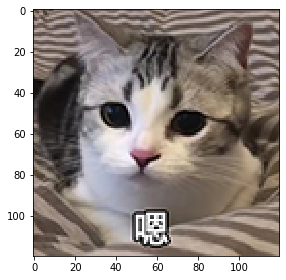

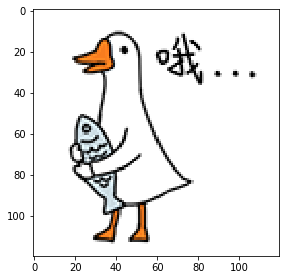

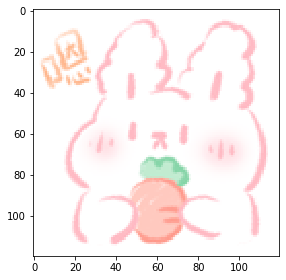

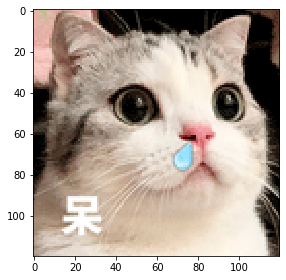

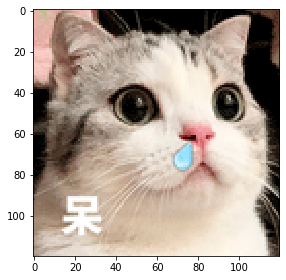

In [25]:
from skimage import io
for label in predicted_demo_label:
    demo_url = url_map[int(label)]
    image = io.imread(demo_url)
    io.imshow(image)
    io.show()